In [118]:
import numpy as np

import pandas as pd

import diffprivlib.tools as dp

import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
na_values={
    'capital-gain': 99999,
    'capital-loss': 99999,
    'hours-per-week': 99,
    'workclass': '?',
    'native-country': '?',
    'occupation': '?'}

private_df = pd.read_csv('./data/adult_with_no_native_country.csv',
                         skipinitialspace=True,
                         na_values=na_values)

synthetic_df = pd.read_csv('./out/correlated_attribute_mode/sythetic_data.csv',
                           skipinitialspace=True)

In [120]:
categorical_attributes = private_df.dtypes.loc[private_df.dtypes=='O'].index.values
numerical_attributes = [col for col in private_df.columns if col not in categorical_attributes]

### Consistency

<AxesSubplot:>

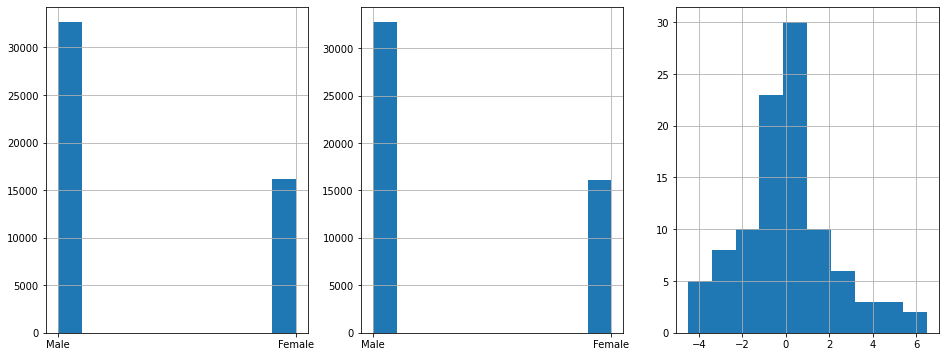

In [242]:
dp_sex_delta = []
for i in range(100):
    dp_sex_delta.append(
        private_df.shape[0]
        - dp.sum((private_df.sex=='Male').values, bounds=(0, 1))
        - dp.sum((private_df.sex=='Female').values, bounds=(0,1)))

fig, axes = plt.subplots(1,3, figsize=(16,6))
private_df.sex.hist(ax=axes[0])
synthetic_df.sex.hist(ax=axes[1])

pd.Series(np.hstack(dp_sex_delta)).hist(ax=axes[2])


### Run mean
note if bounds on dp.mean changed to (0.02, 0.98) it works

<AxesSubplot:>

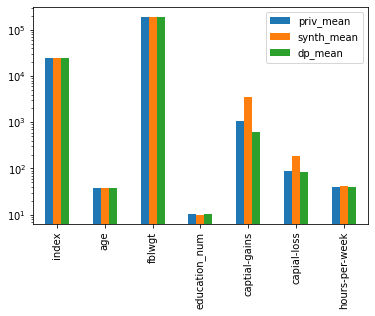

In [258]:
priv_mean = private_df[numerical_attributes].mean()

dp_mean = private_df[numerical_attributes].apply(
    lambda c: dp.mean(
        c.dropna().values,
        epsilon=1,
        bounds=tuple(c.quantile([0.02, 0.98]).values)
    ),
    axis=0)

synth_mean = synthetic_df[numerical_attributes].mean()

comp_means = pd.concat([priv_mean, synth_mean, dp_mean], axis=1)
comp_means.columns = ['priv_mean', 'synth_mean', 'dp_mean']
comp_means.plot.bar(logy=True)#(figsize=(16,12))

### Random Query

(0.0, 23.1)

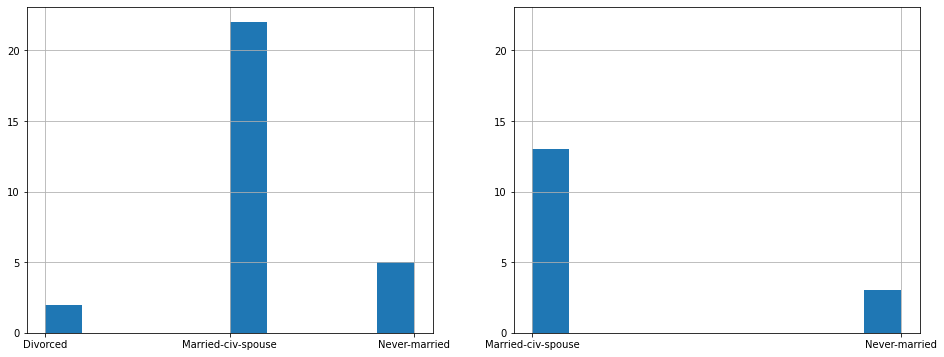

In [257]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
private_df.loc[
    (private_df.age.between(20, 30))
    & (private_df.income == '>50K')
    & (private_df.sex == 'Male')
    & (private_df.fblwgt.between(50000, 75000)),
    'martial-status'
].sort_values().hist(ax=axes[0])

synthetic_df.loc[
    (synthetic_df.age.between(20, 30))
    & (synthetic_df.income == '>50K')
    & (synthetic_df.sex == 'Male')
    & (synthetic_df.fblwgt.between(50000, 60000)),
    'martial-status'
].sort_values().hist(ax=axes[1])

ymax = max(max(axes[0].get_ylim(), axes[1].get_ylim()))
axes[0].set_ylim(0, ymax)
axes[1].set_ylim(0, ymax)